<a href="https://colab.research.google.com/github/Bhagyasri00/Employee_turnover_analysis/blob/main/Employee_turn_over.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The problem at hand revolves around employee turnover, which is causing concern within the organization.  Therefore, the primary objective is to understand why employees are leaving and to develop strategies to mitigate this turnover. This involves analyzing various factors contributing to attrition, such as job satisfaction, compensation, work-life balance.

 # **About Dataset**


  This Dataset has a comprehensive collection of attributes concerning employees, ranging from demographic details to job-related factors.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/HR_capstone_dataset.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.duplicated().sum()

3008

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(11991, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# **Variable Description**


**satisfaction_level**: Employee-reported job satisfaction level [0–1]

**last_evaluation**: Score of the employee's last performance review [0–1]

**number_project**: Number of projects the employee contributes to

**average_monthly_hours**: Average number of hours the employee worked per month

**time_spend_company**: Duration of the employee's tenure with the company (in years)

**Work_accident**: Whether or not the employee experienced an accident while at work

**left**: Whether or not the employee left the company

**promotion_last_5years**: Whether or not the employee was promoted in the last 5 years

**department**: The employee's department

**salary**: The employee's salary (in U.S. dollars)



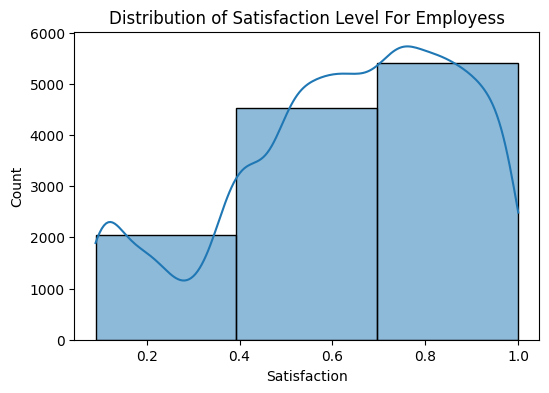

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(x=df.satisfaction_level , data=df , bins= 3,  kde=True)
plt.title("Distribution of Satisfaction Level For Employess")
plt.xlabel("Satisfaction")
plt.savefig('distribution_of_satisfaction_level.png')
plt.show()

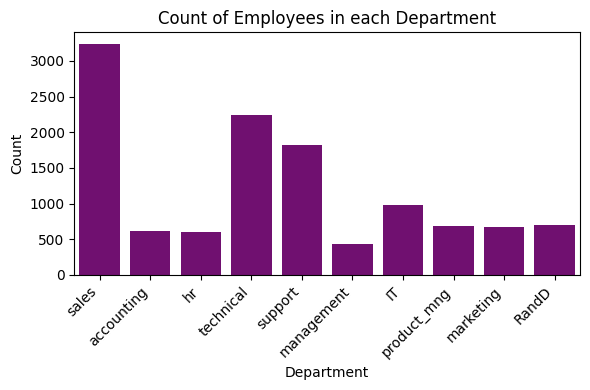

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Department', color='purple')
plt.title('Count of Employees in each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('count_of_employees_in_each_department.png')
plt.show()

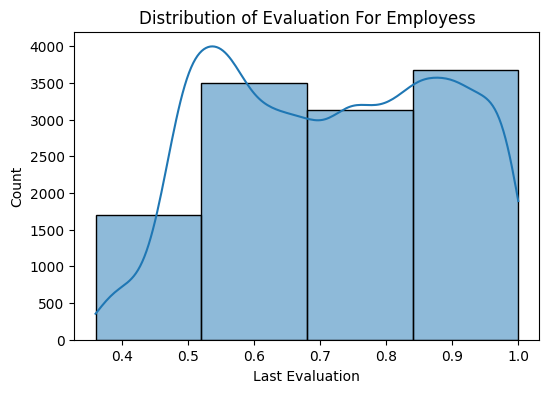

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(x=df.last_evaluation , data=df , bins=4,
    kde=True)
plt.title("Distribution of Evaluation For Employess")
plt.xlabel("Last Evaluation")
plt.savefig('distribution_of_evaluation_for_employees.png')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

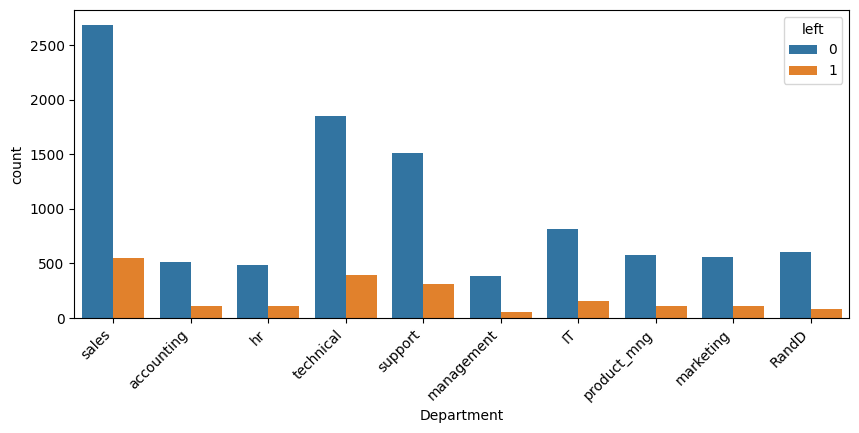

In [ ]:
plt.figure(figsize=(10, 4))

sns.countplot(df, x="Department", hue="left")
plt.savefig('count_of_employees_by_department_and_attrition.png')
plt.xticks(rotation=45 , ha='right')

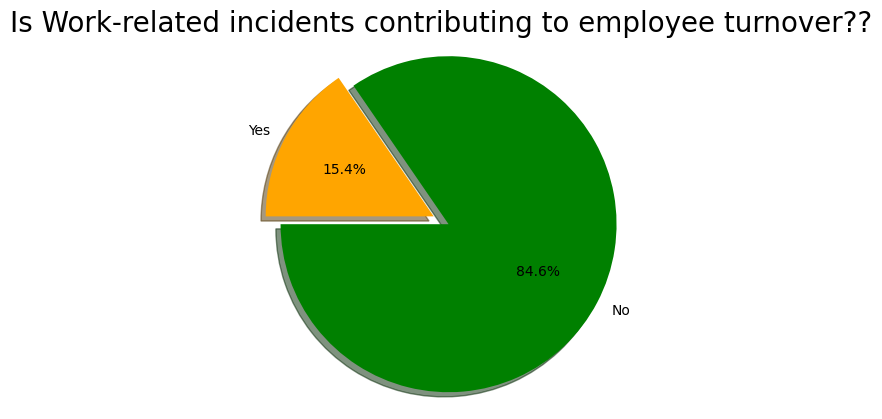

In [ ]:
plt.pie(df['Work_accident'].value_counts(), explode=(0.1, 0.0), labels=['No', 'Yes'], colors=['green', 'orange'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Is Work-related incidents contributing to employee turnover??", fontsize=20)
plt.savefig('work_related_incidents_contributing_to_turnover.png')
plt.show()

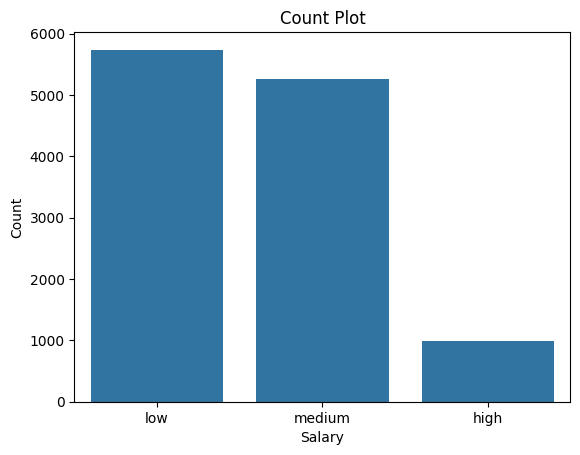

In [ ]:
sns.countplot(x=df.salary, order=['low', 'medium', 'high'])

plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Count Plot')
plt.savefig('count_of_employees_by_salary_level.png')
plt.show()

<ipython-input-26-3f1e6a6753e8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_spend_company', y='left', data=df, estimator=lambda x: sum(x)*100/len(x), palette='coolwarm')


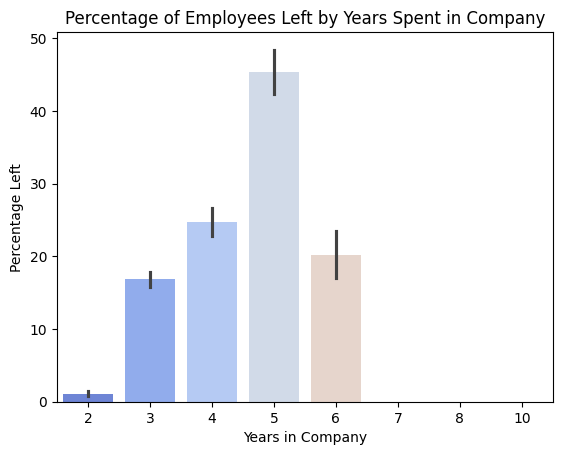

In [ ]:
sns.barplot(x='time_spend_company', y='left', data=df, estimator=lambda x: sum(x)*100/len(x), palette='coolwarm')
plt.title('Percentage of Employees Left by Years Spent in Company')
plt.xlabel('Years in Company')
plt.ylabel('Percentage Left')
plt.savefig('percentage_of_employees_left_by_years_spent_in_company.png')
plt.show()

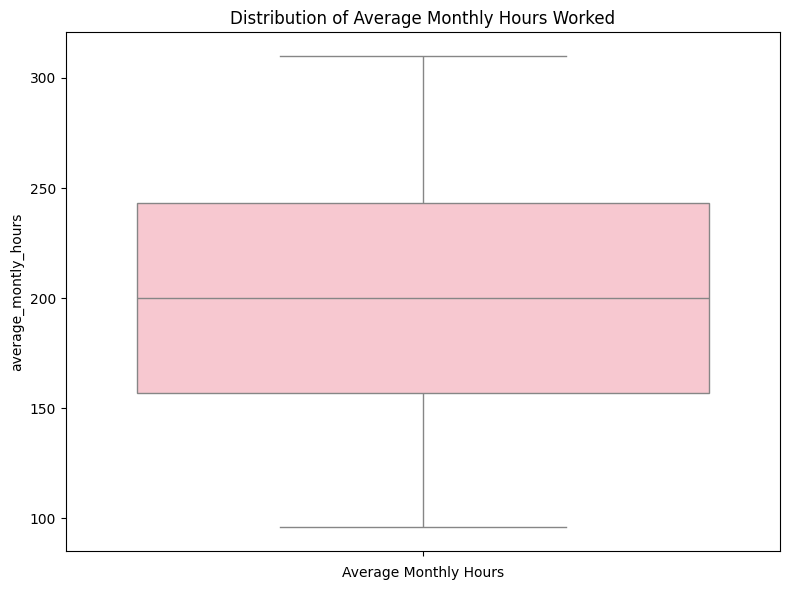

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(df.average_montly_hours, color='Pink')
plt.title('Distribution of Average Monthly Hours Worked')
plt.xlabel('Average Monthly Hours')
plt.tight_layout()
plt.savefig('distribution_of_average_monthly_hours_worked.png')
plt.show()


In [ ]:
promotion_counts= df['promotion_last_5years'].value_counts()

In [ ]:
promotion_counts

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

<ipython-input-28-1eb3821a3e27>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='promotion_last_5years', data=df, palette='autumn')


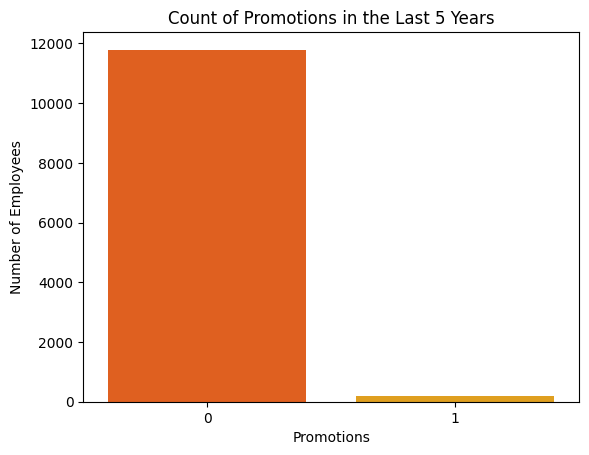

In [ ]:
sns.countplot(x='promotion_last_5years', data=df, palette='autumn')
plt.title('Count of Promotions in the Last 5 Years')
plt.xlabel('Promotions')
plt.ylabel('Number of Employees')
plt.savefig('count_of_promotions_in_the_last_5_years.png')
plt.show()

<ipython-input-29-7f722e93f663>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number_project', data=df, palette='viridis')


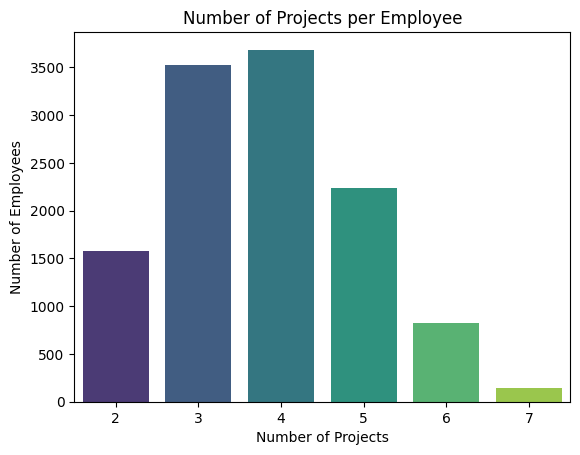

In [ ]:
sns.countplot(x='number_project', data=df, palette='viridis')
plt.title('Number of Projects per Employee')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.savefig('number_of_projects_per_employee.png')
plt.show()

Checking outliers

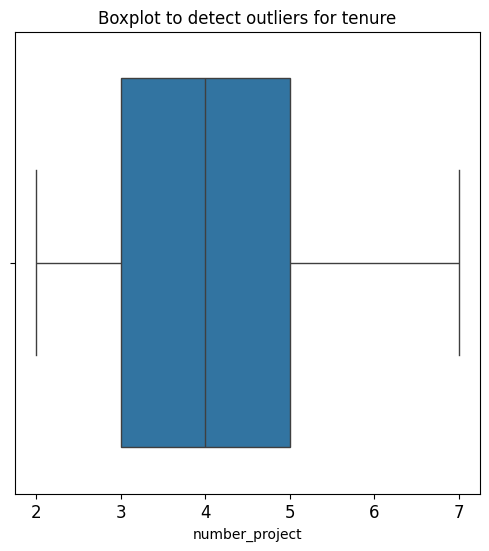

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['number_project'])
plt.show()

**INSIGHTS FROM EDA**

*  Maximum number of employees belong to the Sales Department, with the Management Department having the fewest employees.
*  The Sales Department exhibits a notably high attrition rate compared to other departments.
*  Work-related incidents contribute to a 15.44% turnover rate, suggesting a need for workplace safety improvements.
*  A significant portion of employees receive low salaries, potentially influencing turnover rates.
*  Employees tend to leave the company after approximately five years of tenure.
*  Over the last five years, only 208 employees have been promoted, indicating potential dissatisfaction with growth opportunities.
*  The distribution of projects per employee varies between 2 and 7, indicating a diverse workload.


**BASED ON EDA, FACTORS INFLUENCING EMPLOYEE TURNOVER COULD BE,**

*   High turnover in departments like Sales may indicate specific challenges within those areas.
*   Instances of workplace incidents can contribute to dissatisfaction and turnover.
*   Low salaries may lead to employees seeking better-paying opportunities elsewhere.
*   Employees leaving after a certain tenure, such as five years, could signal issues with career growth or burnout.
*    Limited chances for advancement may lead to frustration and turnover.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')

Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df['Department'] = label_encoder.fit_transform(df['Department'])

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

Text(0.5, 1.0, 'Correlation Heatmap')

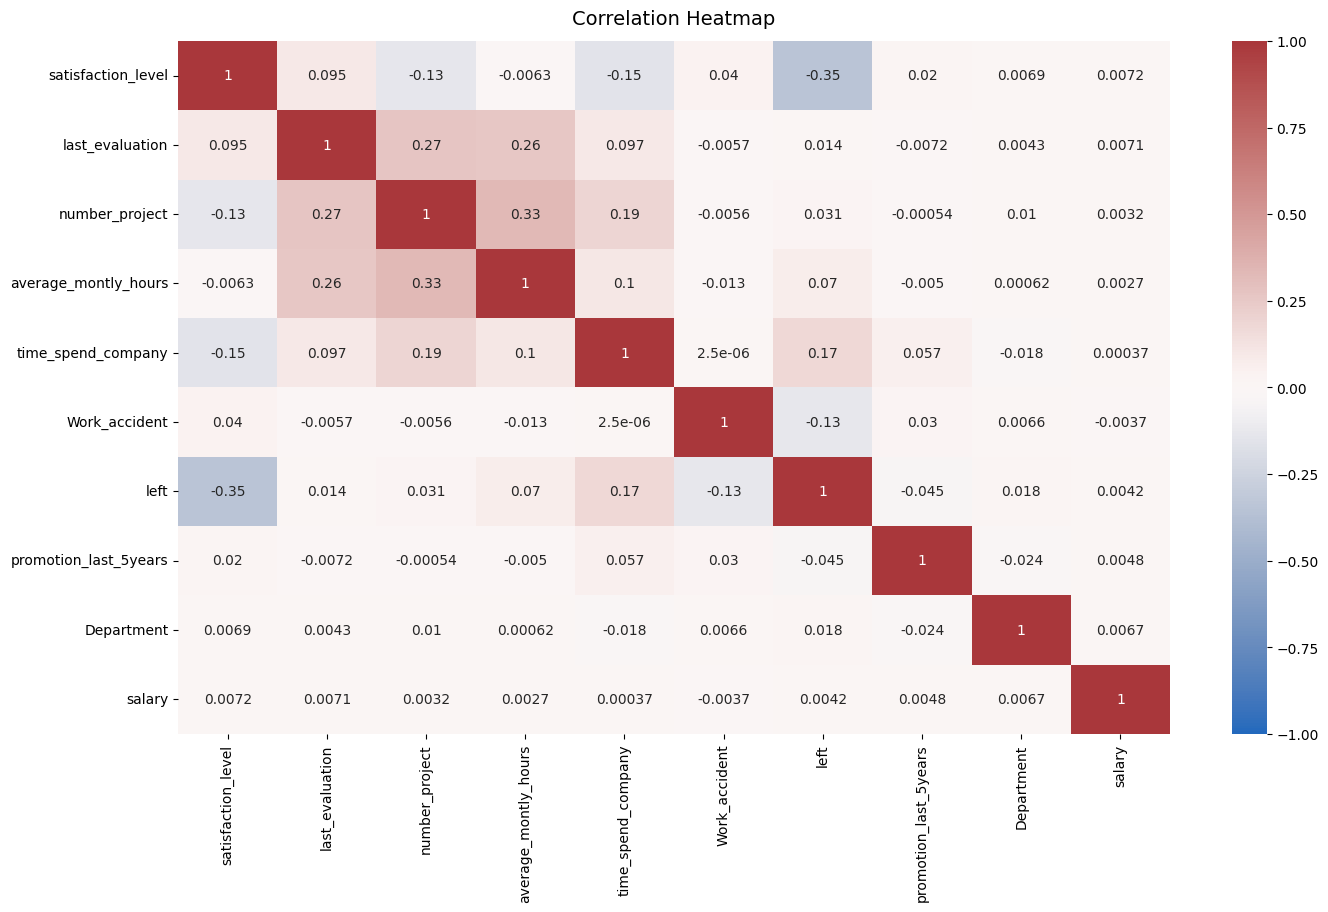

In [ ]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Feature and Target Variable

In [ ]:
X = df.drop(columns=['left'])
y = df['left'] # Target Variable

In [ ]:
X.shape

(11991, 9)

In [ ]:
y.shape

(11991,)

Visualising Important Features by Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importance = rf_model.feature_importances_

In [ ]:
# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

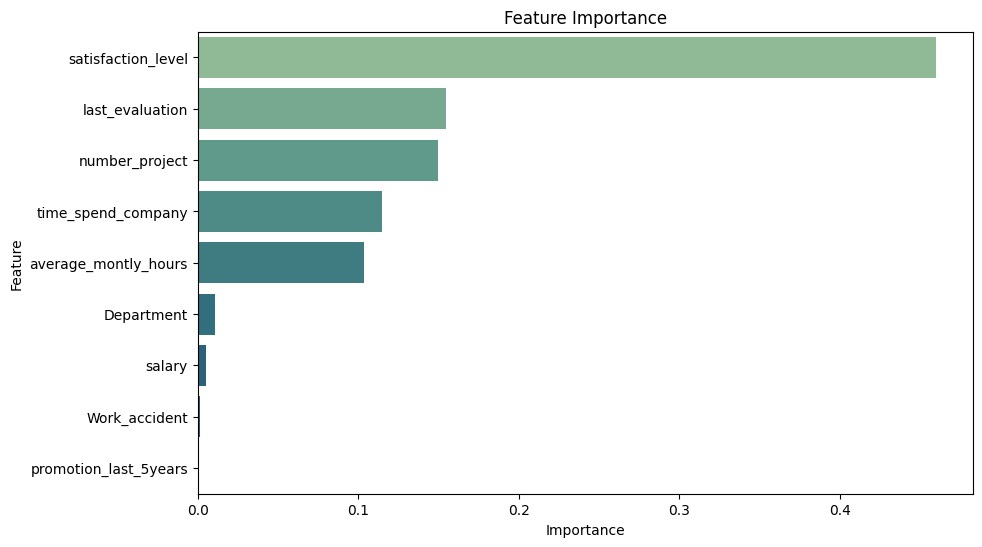

In [ ]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], orient="h", palette='crest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

# Model Implementation

Splitting dataset to training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
lr = LogisticRegression(random_state= 21)

In [ ]:
lr.fit(X,y)

LogisticRegression(random_state=21)

In [ ]:
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [ ]:
lr_accuracy_score_train = accuracy_score(y_train , lr_pred_train)
lr_accuracy_score_test= accuracy_score(y_test , lr_pred_test)

print("Accuracy Score of training:", lr_accuracy_score_train)
print("Accuracy Score of testing:" , lr_accuracy_score_test)

Accuracy Score of training: 0.8336113427856547
Accuracy Score of testing: 0.8311796581909129


In [ ]:
lr_precision_score = precision_score(y_test , lr_pred_test)
lr_precision_score

0.48717948717948717

In [ ]:
lr_f1_score = f1_score(y_test , lr_pred_test)
lr_f1_score

0.27289048473967686

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_pred_train= rf.predict(X_train)

rf_accuracy_score_train = accuracy_score(y_train , rf_pred_train)
rf_accuracy_score_test = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy Score of training:", rf_accuracy_score_train)
print("Accuracy Score of testing:" , rf_accuracy_score_test)

Accuracy Score of training: 1.0
Accuracy Score of testing: 0.980408503543143


In [ ]:
rf_precision_score = precision_score(y_test , y_pred)
rf_f1_score = f1_score(y_test , y_pred)

In [ ]:
print(rf_precision_score)
print(rf_f1_score)

0.9809782608695652
0.9388816644993497


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(randint(3, 20, 5).rvs(5)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [ ]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   random_state=0)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 24, 17, 11, 17, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7938afb7ffa0>},
                   random_state=0, scoring='accuracy')

In [ ]:
best_params = random_search.best_params_
print("Best parameters found:", best_params)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best parameters found: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'log2', 'n_estimators': 177}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9808253438932889
Confusion Matrix:
 [[1991    7]
 [  39  362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [ ]:
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9902001668056714
Test Score: 0.9808253438932889


While comparing two models, Logistic and Random Forest, Random Forest has high accuracy.

In [ ]:
evaluated_model_score= pd.DataFrame({'Train_Score':[lr_accuracy_score_train, rf_accuracy_score_train , train_score] , 'Test_Score':[lr_accuracy_score_test,rf_accuracy_score_test, test_score]}, index= ['Logistic Regression', 'Random Forest' , 'Random Forest with Random SearchCV'] )

In [ ]:
evaluated_model_score= pd.DataFrame({'Train_Score':[lr_accuracy_score_train, rf_accuracy_score_train , train_score] , 'Test_score':[lr_accuracy_score_test,rf_accuracy_score_test, test_score]}, index= ['Logistic Regression', 'Random Forest' , 'Random Forest with Random SearchCV'] )

In [ ]:
evaluated_model_score.style.background_gradient(cmap='Blues')

,Train_Score,Test_score
Logistic Regression,0.833611,0.831180
Random Forest,1.000000,0.980409
Random Forest with Random SearchCV,0.990200,0.980825
